In [139]:
from implementations.matmul_pure_python import matmul as matmul_python
from implementations.matmul_numba import matmul_int64 as matmul_numba
from implementations.matmul_numba import matmul_int64_parallel as matmul_numba_parallel
from implementations.matmul_cuda import matmul_int64 as matmul_cuda
import numpy as np
import sys

sys.path.append('..')
from utils import plot_multiple_bars

n = 500
A = np.random.randint(-128, 127, (n, n))
B = np.random.randint(-128, 127, (n, n))

In [118]:
%%timeit -n 1 -r 1 -o

res = matmul_python(A.tolist(), B.tolist())

19.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<TimeitResult : 19.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)>

In [119]:
matmul_python_time = _

In [21]:
%%timeit -n 1 -r 100 -o

matmul_numba(A, B)

102 ms ± 5.48 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<TimeitResult : 102 ms ± 5.48 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)>

In [22]:
matmul_numba_time = _

In [24]:
%%timeit -n 1 -r 100 -o

matmul_numba_parallel(A, B)

The slowest run took 4.59 times longer than the fastest. This could mean that an intermediate result is being cached.
27 ms ± 12.4 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<TimeitResult : 27 ms ± 12.4 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)>

In [25]:
matmul_numba_parallel_time = _

In [26]:
%%timeit -n 1 -r 100 -o

matmul_cuda(A, B)

The slowest run took 5.11 times longer than the fastest. This could mean that an intermediate result is being cached.
5.33 ms ± 2.05 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<TimeitResult : 5.33 ms ± 2.05 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)>

In [27]:
matmul_numba_cuda_time = _

In [28]:
%%timeit -n 1 -r 100 -o

np.dot(A, B)

112 ms ± 12.7 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)


<TimeitResult : 112 ms ± 12.7 ms per loop (mean ± std. dev. of 100 runs, 1 loop each)>

In [29]:
matmul_numpy_time = _

In [133]:
time_results = {'numpy': matmul_numpy_time, 'numba': matmul_numba_time, 'numba parallel': matmul_numba_parallel_time, 'numba cuda': matmul_numba_cuda_time,} #'pure python': matmul_python_time, 

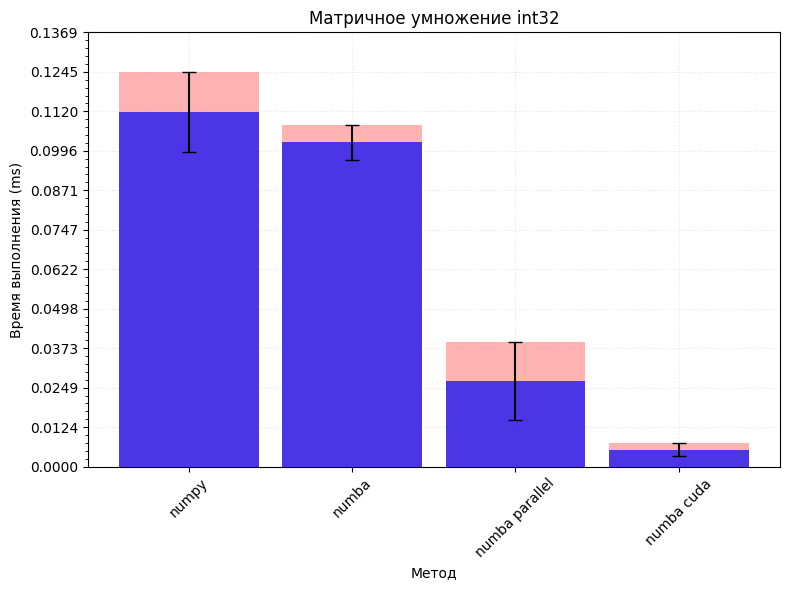

In [136]:
plot_multiple_bars(time_results, title='Матричное умножение int32', y_title = 'Время выполнения (ms)') #, ymax = 3 * matmul_numpy_time.average)